# Preface

Purpose:

Covid-19 Analysis with Weather Data (Temp and Humidity) for selected two Cities- Sao Paulo(Brazil) and New York (USA) to show if these weather variables impact Covid new cases increase.

Data:

1. Resources folder under Archana Branch- https://github.com/archinarula/Group-5-Project/tree/Archana/Archana_WorkingFolder/Resources



# Dependencies and Data Load

In [2]:
# first import the dependencies
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

Import the data

In [3]:
# Add the Resources path variables:
NY_Covid = "Resources/NYCovid_newdata.csv"
SP_Covid = "Resources/SPCovid_newdata.csv"
Weather= "Resources/NY_SP_Weather_df.csv"


#Read CSVs and Create Dataframes:
NYCovid_df = pd.read_csv(NY_Covid, parse_dates=['date'], encoding="ISO-8859-1",low_memory=False)
SPCovid_df = pd.read_csv(SP_Covid, parse_dates=['date'], encoding="ISO-8859-1",low_memory=False)
CitiesWeather_df = pd.read_csv(Weather, parse_dates=['date'], encoding="ISO-8859-1",low_memory=False)



# Visualizations on Individual Cities- Noise Reduction using Averages (New Cases, Temp and Humidity)

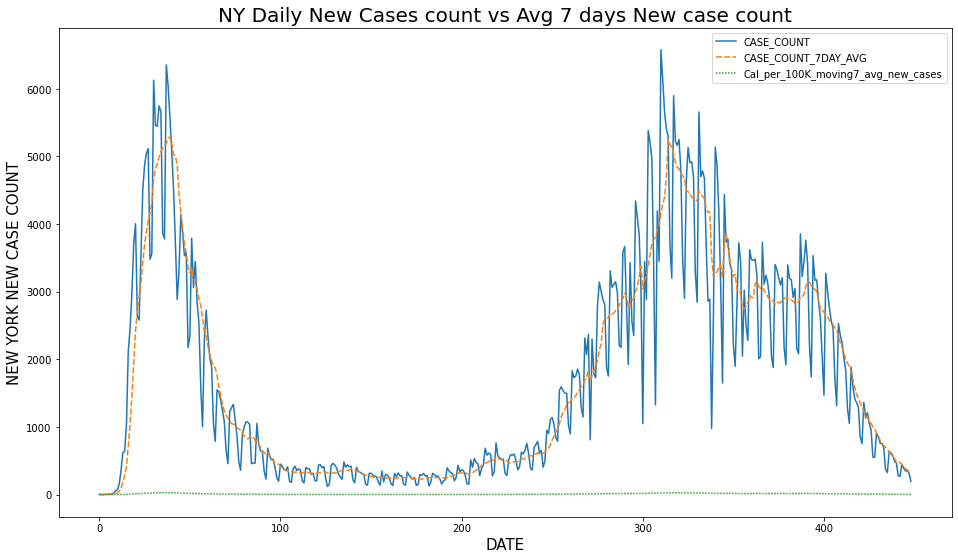

In [4]:
# Plotting using Seaborn
plt.figure(figsize = (16,9)) # figure size with ratio 16:9
#sns.lineplot(x = "date",y = "CASE_COUNT", markers=True, dashes=False, data=NYCovid_df)
sns.lineplot(data=NYCovid_df)
plt.title("NY Daily New Cases count vs Avg 7 days New case count", fontsize = 20)
plt.xlabel("DATE", fontsize = 15)
plt.ylabel("NEW YORK NEW CASE COUNT", fontsize = 15)
plt.show()  

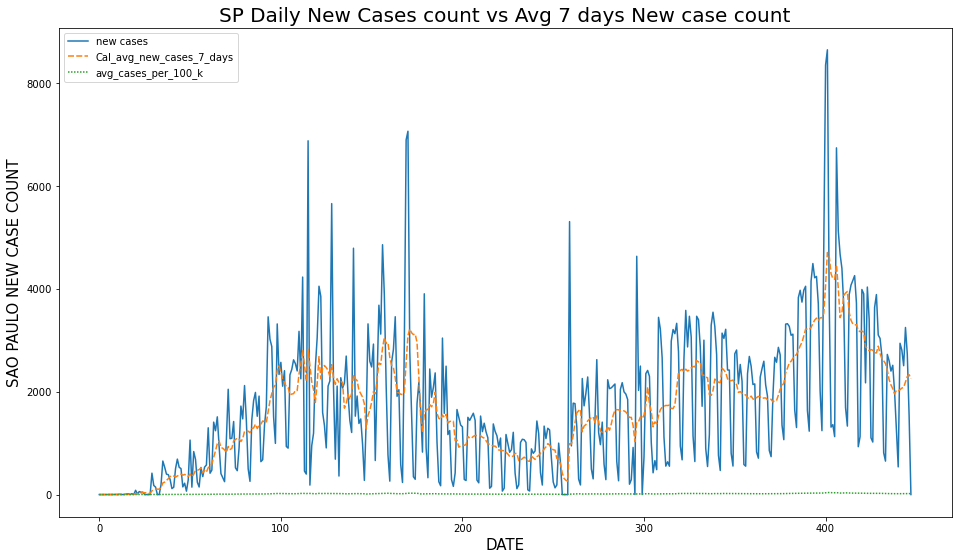

In [5]:
# Plotting using Seaborn
plt.figure(figsize = (16,9)) # figure size with ratio 16:9
#sns.lineplot(x = "date",y = "new cases", markers=True, dashes=False, data=SPCovid_df)
sns.lineplot(data=SPCovid_df)
plt.title("SP Daily New Cases count vs Avg 7 days New case count", fontsize = 20)
plt.xlabel("DATE", fontsize = 15)
plt.ylabel("SAO PAULO NEW CASE COUNT", fontsize = 15)
plt.show()  

Weather data plotting for New York- for the Avg Temp and Avg Humidity dailies

In [6]:
CitiesWeather_df.head()

,date,city_name,lat,lon,temp_mean,humidity_mean,temp_min,temp_max,1_7_day_avg_temp,8_14_day_avg_temp,1_7_day_avg_humidity,8_14_day_avg_humidity,percent_change_in_temp,percent_change_in_humidity,1_15_day_avg_temp,1_15_day_avg_humidity
0,2020-01-16,New York,40.712775,-74.005973,6.97,71.04,2.78,10.00,7.23,4.82,68.06,68.26,-50.00,0.29,5.89,67.66
1,2020-01-17,New York,40.712775,-74.005973,-1.48,40.42,-6.67,4.55,8.49,4.09,71.70,66.39,-107.58,-8.00,6.09,68.35
2,2020-01-18,New York,40.712775,-74.005973,-4.42,56.04,-7.22,1.11,7.71,3.60,67.86,64.84,-114.17,-4.66,5.77,67.14
3,2020-01-19,New York,40.712775,-74.005973,3.39,76.44,-1.67,7.22,5.22,4.22,65.52,61.64,-23.70,-6.29,4.98,65.66
4,2020-01-20,New York,40.712775,-74.005973,-2.58,45.25,-7.22,2.78,3.29,5.93,66.96,62.60,44.52,-6.96,4.63,64.44


In [7]:
# Set x axis and tick locations for the weather data plotting
x_axis = np.arange(len(CitiesWeather_df))
tick_locations = [value for value in x_axis]

In [8]:
# Create the NY Weather Temp DataFrame.
NYWeatherTemp_df =CitiesWeather_df[CitiesWeather_df.city_name == 'New York'][['date', 'temp_mean','1_7_day_avg_temp','8_14_day_avg_temp', '1_15_day_avg_temp' ]]
print(NYWeatherTemp_df.shape)
NYWeatherTemp_df.head()
  

(487, 5)


,date,temp_mean,1_7_day_avg_temp,8_14_day_avg_temp,1_15_day_avg_temp
0,2020-01-16,6.97,7.23,4.82,5.89
1,2020-01-17,-1.48,8.49,4.09,6.09
2,2020-01-18,-4.42,7.71,3.60,5.77
3,2020-01-19,3.39,5.22,4.22,4.98
4,2020-01-20,-2.58,3.29,5.93,4.63


In [9]:
NYWeatherTemp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 486
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               487 non-null    datetime64[ns]
 1   temp_mean          487 non-null    float64       
 2   1_7_day_avg_temp   487 non-null    float64       
 3   8_14_day_avg_temp  487 non-null    float64       
 4   1_15_day_avg_temp  487 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 22.8 KB


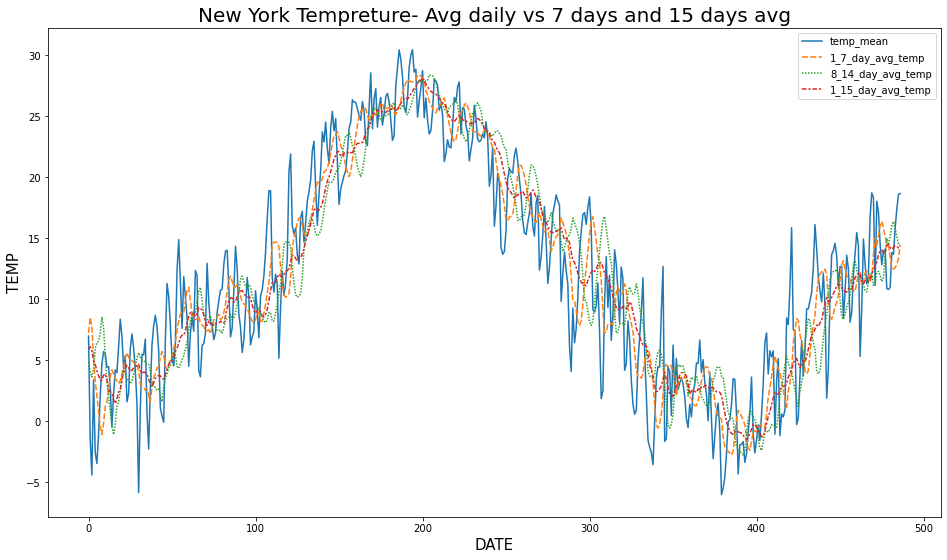

In [10]:
# Plotting using Seaborn
plt.figure(figsize = (16,9)) # figure size with ratio 16:9
#sns.lineplot(x = "Reported_date", y = "temp_mean", markers=True, dashes=False, data=NYWeatherTemp_df)
sns.lineplot(data=NYWeatherTemp_df)
plt.title("New York Tempreture- Avg daily vs 7 days and 15 days avg", fontsize = 20)
plt.xlabel("DATE", fontsize = 15)
plt.ylabel("TEMP", fontsize = 15)
plt.show()  

In [11]:
# Create the NY Weather Humidity DataFrame.
NYWeatherHumidity_df =CitiesWeather_df[CitiesWeather_df.city_name == 'New York'][['date', 'humidity_mean','1_7_day_avg_humidity','8_14_day_avg_humidity', '1_15_day_avg_humidity']]
print(NYWeatherHumidity_df.shape)
NYWeatherHumidity_df.head()


(487, 5)


,date,humidity_mean,1_7_day_avg_humidity,8_14_day_avg_humidity,1_15_day_avg_humidity
0,2020-01-16,71.04,68.06,68.26,67.66
1,2020-01-17,40.42,71.70,66.39,68.35
2,2020-01-18,56.04,67.86,64.84,67.14
3,2020-01-19,76.44,65.52,61.64,65.66
4,2020-01-20,45.25,66.96,62.60,64.44


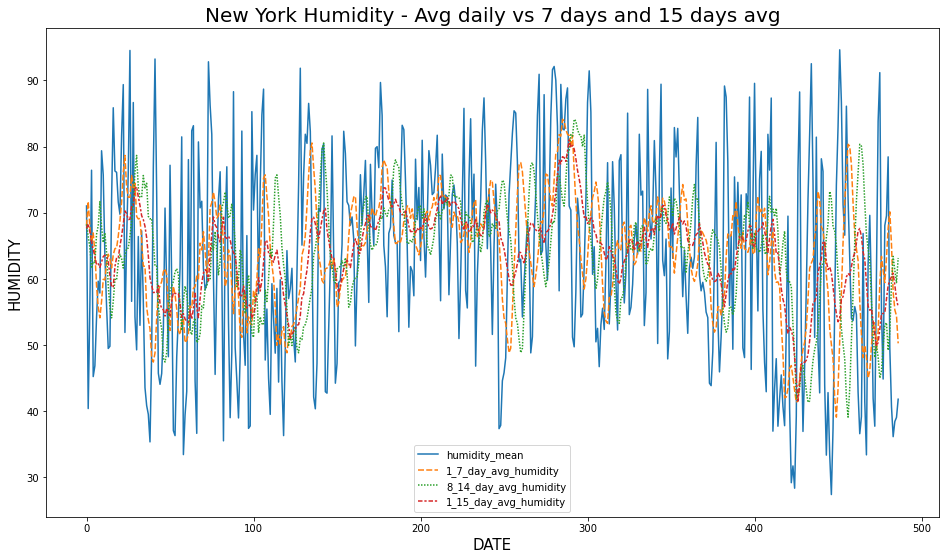

In [12]:
# Plotting using Seaborn-NY Humidity
plt.figure(figsize = (16,9)) # figure size with ratio 16:9
#sns.lineplot(x = "date", y = "humidity_mean", markers=True, dashes=False, data=NYWeatherHumidity_df)
sns.lineplot(data=NYWeatherHumidity_df)
plt.title("New York Humidity - Avg daily vs 7 days and 15 days avg", fontsize = 20)
plt.xlabel("DATE", fontsize = 15)
plt.ylabel("HUMIDITY", fontsize = 15)
plt.show()  

Weather data plotting for Sao Paulo- for the Avg Temp and Avg Humidity dailies

In [13]:
# Create the SP Weather Temp DataFrame and reset index for df.
SPWeatherTemp_df =CitiesWeather_df[CitiesWeather_df.city_name == 'Sao Paulo'][['date', 'temp_mean','1_7_day_avg_temp','8_14_day_avg_temp', '1_15_day_avg_temp' ]].reset_index()
del SPWeatherTemp_df["index"]
print(SPWeatherTemp_df.shape)
SPWeatherTemp_df.head()


(487, 5)


,date,temp_mean,1_7_day_avg_temp,8_14_day_avg_temp,1_15_day_avg_temp
0,2020-01-16,25.83,24.28,22.88,23.72
1,2020-01-17,20.37,24.49,23.10,23.73
2,2020-01-18,19.82,23.69,23.80,23.56
3,2020-01-19,21.29,22.72,24.57,23.48
4,2020-01-20,21.73,22.28,25.03,23.49


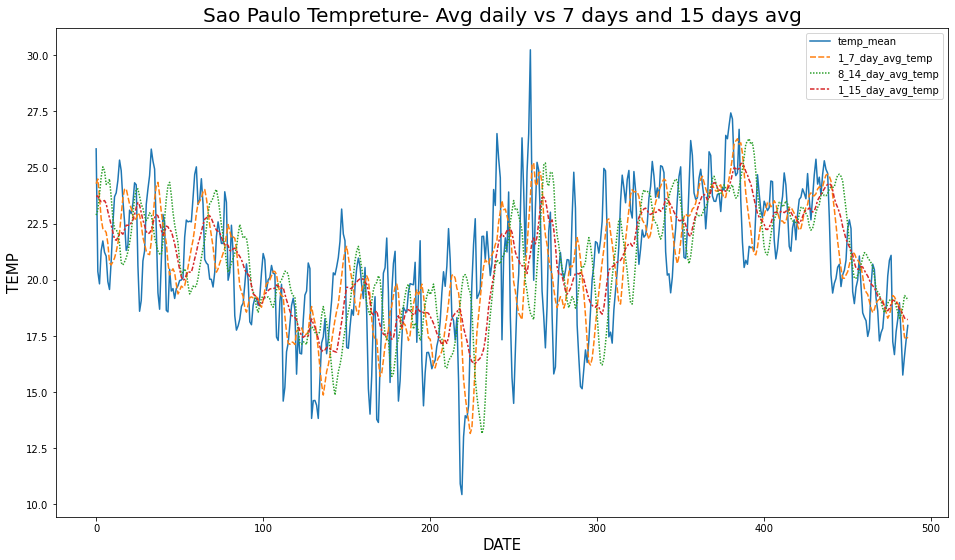

In [14]:
# Plotting using Seaborn- SP Temp
plt.figure(figsize = (16,9)) # figure size with ratio 16:9
#sns.lineplot(x = "Reported_date", y = "temp_mean", markers=True, dashes=False, data=SPWeatherTemp_df)
sns.lineplot(data=SPWeatherTemp_df)
plt.title("Sao Paulo Tempreture- Avg daily vs 7 days and 15 days avg", fontsize = 20)
plt.xlabel("DATE", fontsize = 15)
plt.ylabel("TEMP", fontsize = 15)
plt.show()  

In [15]:
# Create the SP Weather Humidity DataFrame.
SPWeatherHumidity_df =CitiesWeather_df[CitiesWeather_df.city_name == 'Sao Paulo'][['date', 'humidity_mean','1_7_day_avg_humidity','8_14_day_avg_humidity', '1_15_day_avg_humidity']].reset_index()
del SPWeatherHumidity_df["index"]
print(SPWeatherHumidity_df.shape)
SPWeatherHumidity_df.head()


(487, 5)


,date,humidity_mean,1_7_day_avg_humidity,8_14_day_avg_humidity,1_15_day_avg_humidity
0,2020-01-16,77.38,77.59,78.91,77.45
1,2020-01-17,86.83,77.00,78.93,78.19
2,2020-01-18,81.71,78.70,77.65,78.55
3,2020-01-19,81.29,80.26,76.37,78.41
4,2020-01-20,77.33,79.78,76.44,78.51


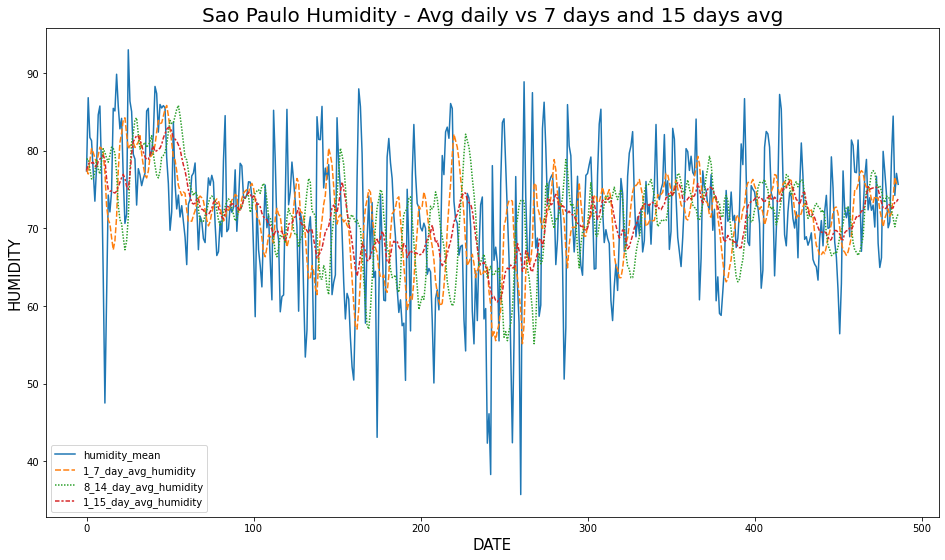

In [16]:
# Plotting using Seaborn- SP Humidity
plt.figure(figsize = (16,9)) # figure size with ratio 16:9
#sns.lineplot(x = "Reported_date", y = "humidity_mean", markers=True, dashes=False, data=SPWeatherHumidity_df)
sns.lineplot(data=SPWeatherHumidity_df)
plt.title("Sao Paulo Humidity - Avg daily vs 7 days and 15 days avg", fontsize = 20)
plt.xlabel("DATE", fontsize = 15)
plt.ylabel("HUMIDITY", fontsize = 15)
plt.show()  

In [17]:
#SPWeatherHumidity_df[SPWeatherHumidity_df['humidity_mean']>90]

SPWeatherHumidity_df[SPWeatherHumidity_df['humidity_mean']<50]

,date,humidity_mean,1_7_day_avg_humidity,8_14_day_avg_humidity,1_15_day_avg_humidity
11,2020-01-27,47.50,77.20,79.78,78.90
174,2020-07-08,43.08,66.87,72.67,68.60
240,2020-09-12,42.33,65.00,63.65,64.56
241,2020-09-13,46.12,61.83,64.55,62.86
242,2020-09-14,38.29,60.12,65.11,62.05
255,2020-09-27,42.38,73.50,59.58,64.92
260,2020-10-02,35.71,59.47,73.58,66.59
